# **ANN for Classification**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

**Loading Dataset**

In [2]:
df = pd.read_csv("../Datasets/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Checking for duplicates**

In [3]:
df.duplicated().sum()

np.int64(0)

**Checking for missing values**

In [4]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

**Dropping Unnecessary columns**

In [5]:
df = df.drop("customer_id", axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

This dataset is heavily imbalanced and biased towards 0 (not churning) and we will have to balance the dataset further but for this I will keep the dataset similar to logistic regression example for a better comparison.

**Handling Categorical Variables**

We will convert the gender into Binary using Label Encoder

In [7]:
#converting the value of column to 0 or 1
from sklearn.preprocessing import LabelEncoder

variables = ['gender']

encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

We will convert the country into Nominal variable using OneHotEncoder

In [8]:
from sklearn.preprocessing import OneHotEncoder

variables = ['country']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [9]:
df = df.drop("country_France", axis=1)
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


**Defining X and y variables**

In [10]:
X = df.drop("churn", axis=1)

y_temp = df['churn']

**Encoding**

In [11]:
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

y = tf.keras.utils.to_categorical(y_enc)
categories = list(le.classes_)
categories

[np.int64(0), np.int64(1)]

**Train/test split**

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

**Neural Network**

In [13]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\stsaa\Desktop\Deep-Learning\.venv\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390 (1.52 KB)

 Trainable params: 368 (1.44 KB)

 Non-trainable params: 22 (88.00 B)

**Training**

In [14]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7771 - loss: 3.2773 - val_accuracy: 0.8154 - val_loss: 1.9235
Epoch 2/300
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7915 - loss: 1.1725 - val_accuracy: 0.8154 - val_loss: 0.5951
Epoch 3/300
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.7915 - loss: 0.5198 - val_accuracy: 0.8154 - val_loss: 0.4648
Epoch 4/300
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.7915 - loss: 0.4878 - val_accuracy: 0.8154 - val_loss: 0.4578
Epoch 5/300
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7915 - loss: 0.4797 - val_accuracy: 0.8154 - val_loss: 0.4531
Epoch 6/300
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.7915 - loss: 0.4751 - val_accuracy: 0.8154 - val_loss: 0.4454
Epoch 7/300
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.8035 - loss: 0.4646 - val_accuracy: 0.8331 - val_loss: 0.4376
Epoch 8/300
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8211 - loss: 0.4

<Axes: >

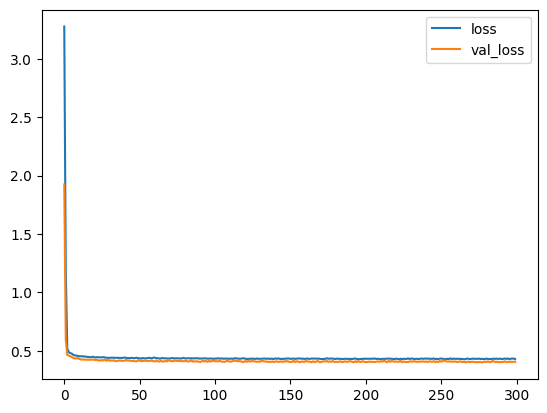

In [15]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

the model is learning well without over fitting

<Axes: >

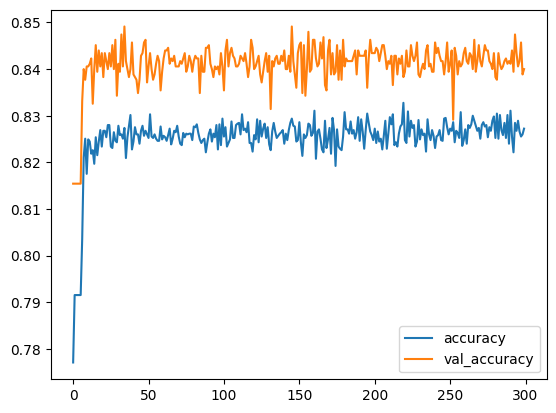

In [ ]:
loss_df[['accuracy', 'val_accuracy']].plot()

the validation accuracy is quite high showing there is room for improvement still in the model

In [17]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.4092777371406555, 0.8371428847312927]

Train data evaluation:
[0.4191712439060211, 0.8323076963424683]


In [18]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

y_test = np.argmax(y_test, axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step


**Confusing Matrix**

<Axes: >

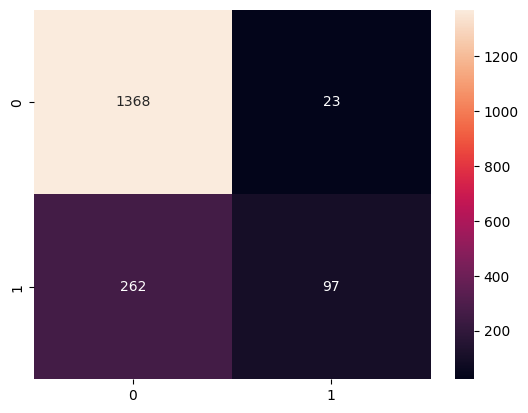

In [19]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)

This confirms the biasedness towards no churn ouput and we will further balance dataset to even the biasedness

**Metrics**

In [20]:
print(classification_report(y_test, test_predictions, target_names=['No Churn', 'Churn']))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

    No Churn       0.84      0.98      0.91      1391
       Churn       0.81      0.27      0.41       359

    accuracy                           0.84      1750
   macro avg       0.82      0.63      0.66      1750
weighted avg       0.83      0.84      0.80      1750


Model overall accuracy: 83.71%


The metrics are quite average but its not really any use as it cant really predict if a customer will churn so it predicting no churn is basically a default situation.

In [21]:
roc_auc_score(y, model.predict(X), multi_class="ovr")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


0.7895296120107781

**Testing with Imaginary Values**

In [22]:
df.tail()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,0,0


In [25]:
# Gender -column: 0 => Female, 1 => Male
tester_row = {
    'credit_score': 771,
    'gender': 1,
    'age': 39,
    'tenure': 5,
    'balance': 0.0,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 0,
    'estimated_salary': 96270.64,
    'country_Germany':0,
    'country_Spain':0

}

tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

np.set_printoptions(precision=9, suppress=True)

# 0 No Churn, 1 Churn
print(f"Predicted Output: {result_text}")
print()
print("Probabilities by class:")
print(categories)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Output: 0

Probabilities by class:
[np.int64(0), np.int64(1)]
[0.8494707  0.15052927]


**Exporting model**

In [24]:
model.save("ann_classification_model.keras")